## 3 boites en GS :

  - box1 : 376 740 124 585
  - box2 : 736 1099 123 574
  - box3 : 1096 1457 122 565

## 4 boites en EU :
  
  - box1 : 75 256 98 326
  - box2 : 70 253 324 568
  - box3 : 60 245 563 826
  - box4 : 21 208 1089 1391


In [1]:
import sys
import xarray as xr
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import glob
from netCDF4 import Dataset
import cartopy.crs as ccrs
import os

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%autosave 60

/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}


Autosaving every 60 seconds


In [2]:
sys.path.insert(0,"/scratch/cnt0024/hmg2840/albert7a/DEV/git/powerspec/powerspec")
import powerspec as pp

In [3]:
sys.path.insert(0,"/scratch/cnt0024/hmg2840/albert7a/DEV/git/diags-CMEMS-on-occigen/common-lib/")
import GriddedData
import WavenumberSpectrum as ws


In [4]:
# Datasets of daily surface meridional and zonal velocities

fileu = sorted(glob.glob("/store/colombo/GS36/GS36-MPC001-S/1d/2012/GS36-MPC001_y2012m??d??.1d_gridU.nc"))
filev = sorted(glob.glob("/store/colombo/GS36/GS36-MPC001-S/1d/2012/GS36-MPC001_y2012m??d??.1d_gridV.nc"))

In [5]:
# Some functions that allow us to compute spectra in boxes

##########################################
def get_values_in_box(imin,imax,jmin,jmax,data):
    values = data[:,0,jmin:jmax+1,imin:imax+1]
    values = ma.masked_invalid(values)
    return values


##########################################
def compute_spec_for_box(imin,imax,jmin,jmax,data,Mth,navlon,navlat,name):
    var = get_values_in_box(imin,imax,jmin,jmax,data)
    pspec,kspec = compute_spec(var,navlon,navlat)
    np.savez(WaveSpecResult+'WaveSpec_'+name+'_'+param+'_'+Mth, kspec=kspec ,pspec=pspec)

##########################################
def compute_spec(data,navlon,navlat):
    days = len(data)
    mth_pspec = []
    for it in np.arange(0,days):
        arr = data[it]
        datab = arr.squeeze()
        pspec,kstep = pp.wavenumber_spectra(datab,navlon,navlat)
        mth_pspec.append(pspec)
    mthly_pspec = np.array(mth_pspec)
    mean_mthly_pspec = mthly_pspec.mean(axis=0)
    return kstep,mean_mthly_pspec

In [6]:
# Implementation for surface zonal velocities U

imin=376
imax=740
jmin=124
jmax=585

param='Uspec'
varname = 'vozocrtx'
filenames = fileu
WaveSpecResult = '/scratch/cnt0024/hmg2840/albert7a/GS36-spec/GS36-MPC001-'+str(param)+'/'
YrMth  = ['2012m01','2012m02','2012m03','2012m04','2012m05','2012m06','2012m07','2012m08','2012m09','2012m10','2012m11','2012m12']

for ii in np.arange(12):
    Mth = YrMth[ii]
    if not os.path.exists(WaveSpecResult+'WaveSpec_box1_'+param+'_'+Mth+'.npz'):
        filename="/store/colombo/GS36/GS36-MPC001-S/1d/2012/GS36-MPC001_y"+str(YrMth[ii])+"d??.1d_gridU.nc"
        ds = xr.open_mfdataset(filename,chunks={'x':500,'y':500,'time_counter':1})
        data = ds[varname]
        navlon=ds.nav_lon[imin:imax+1,jmin:jmax+1]
        navlat=ds.nav_lat[imin:imax+1,jmin:jmax+1]
        compute_spec_for_box(imin,imax,jmin,jmax,data,Mth,navlon,navlat,'box1')


In [6]:
# Implementation for surface zonal velocities U

imin=376
imax=740
jmin=124
jmax=585

param='Vspec'
varname = 'vomecrty'
filenames = fileu
WaveSpecResult = '/scratch/cnt0024/hmg2840/albert7a/GS36-spec/GS36-MPC001-'+str(param)+'/'
YrMth  = ['2012m01','2012m02','2012m03','2012m04','2012m05','2012m06','2012m07','2012m08','2012m09','2012m10','2012m11','2012m12']

for ii in np.arange(12):
    Mth = YrMth[ii]
    if not os.path.exists(WaveSpecResult+'WaveSpec_box1_'+param+'_'+Mth+'.npz'):
        filename="/store/colombo/GS36/GS36-MPC001-S/1d/2012/GS36-MPC001_y"+str(YrMth[ii])+"d??.1d_gridV.nc"
        ds = xr.open_mfdataset(filename,chunks={'x':500,'y':500,'time_counter':1})
        data = ds[varname]
        navlon=ds.nav_lon[imin:imax+1,jmin:jmax+1]
        navlat=ds.nav_lat[imin:imax+1,jmin:jmax+1]
        compute_spec_for_box(imin,imax,jmin,jmax,data,Mth,navlon,navlat,'box1')


In [7]:
# Folders containing U and V spectral
u_database = '/scratch/cnt0024/hmg2840/albert7a/GS36-spec/GS36-MPC001-Uspec/'
v_database = '/scratch/cnt0024/hmg2840/albert7a/GS36-spec/GS36-MPC001-Vspec/'

In [9]:
# Folders to contain computed KE spectral
KEspecFolder = '/scratch/cnt0024/hmg2840/albert7a/GS36-spec/GS36-MPC001-KEspec/'
!mkdir -p $KEspecFolder

In [10]:
    u_filenames = sorted(glob.glob(u_database + 'WaveSpec_box1_Uspec_*.npz'))
    v_filenames = sorted(glob.glob(v_database + 'WaveSpec_box1_Vspec_*.npz'))
    for i in range(len(u_filenames)):
        uspec = np.load(u_filenames[i])['pspec']
        vspec = np.load(v_filenames[i])['pspec']
        kspec = np.load(u_filenames[i])['kspec']
        KEspec = 0.5*(uspec + vspec)
        np.savez(KEspecFolder+'WaveSpec_box1_KEspec_'+YrMth[i]+'.npz',kspec = kspec,KEspec = KEspec)

In [11]:
# Some functions to make the plots

def mean_pspec(filenames,i,j):
    ''' Compute mean spectrum'''
    _pspec = []
    for filename in filenames:
        spec = np.load(filename)
        kspec = spec['kspec'];
        pspec = spec['KEspec'];
        _pspec.append(pspec) 
    pspec_ar = np.array(_pspec)
    mean_pspec = pspec_ar[i:j].mean(axis=0)
    return kspec,mean_pspec

def comp_slope(database,i,j):
    ''' Compute slope of avearged spectrum'''
    slope_10_100 = []
    slope_70_250 = []
    for box in boxes:
        filenames = sorted(glob.glob(database + 'KEspec/WaveSpec_'+box.name+'_KEspec_*.npz'))
        kpsec,pspec = mean_pspec(filenames,i,j)
        m1 = pp.get_slope(kpsec,pspec,10*1E3,100*1E3)
        m2 = pp.get_slope(kpsec,pspec,70*1E3,250*1E3)
        slope_10_100.append(m1)
        slope_70_250.append(m2)
    slope_10_100_arr = np.array(slope_10_100)
    slope_70_250_arr = np.array(slope_70_250)
    return slope_10_100_arr,slope_70_250_arr

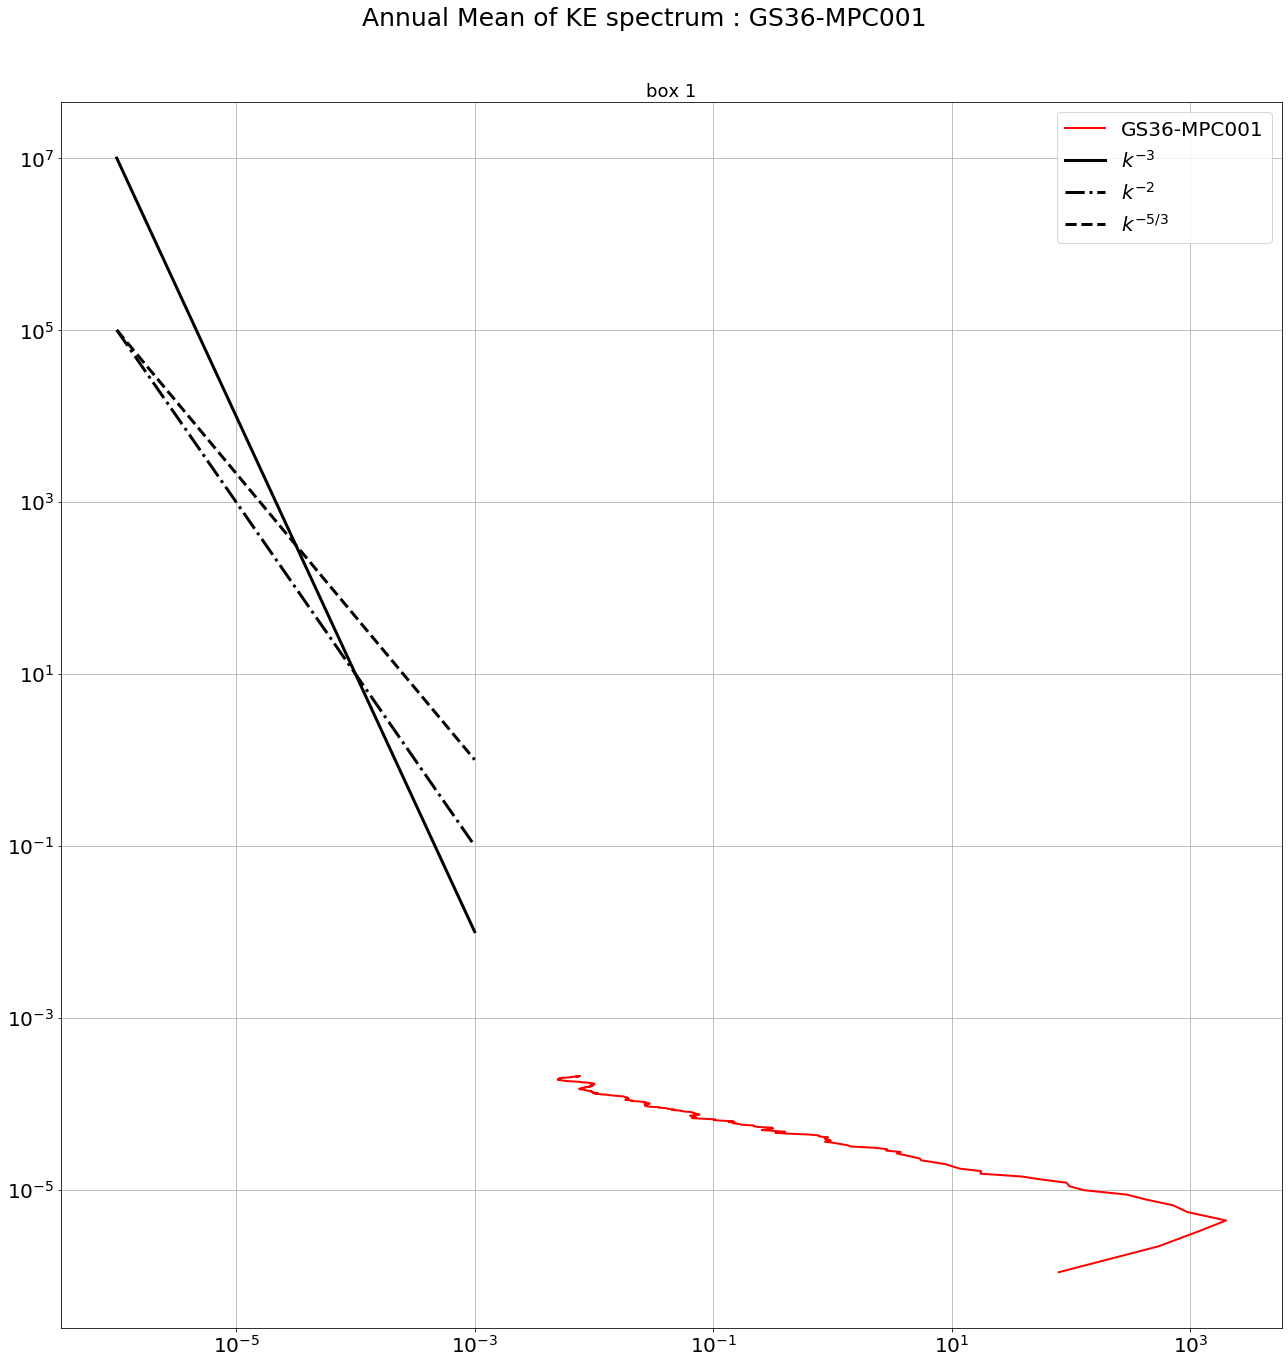

In [18]:
# Final Plots
import pylab as plot
params = {'legend.fontsize': 20,
          'legend.handlelength': 2,
          'axes.titlesize' : 24,
          'axes.labelsize' : 20,
          'lines.linewidth' : 3,
          'lines.markersize' : 10,
          'xtick.labelsize' : 20,
          'ytick.labelsize' : 20}

plot.rcParams.update(params)

fig, axs = plt.subplots(1,1, figsize=(18, 18))
title = 'Annual Mean of KE spectrum : GS36-MPC001'
plt.suptitle(title,size = 25,y=1.05)

# - general slope
k = np.array([1E-6,1E-3])
s3 = k**-3/1.e11
s2 = k**-2/1.e7
s53 = k**(-5./3.)/1.e5

GS36_filenames = sorted(glob.glob('/scratch/cnt0024/hmg2840/albert7a/GS36-spec/GS36-MPC001-KEspec/WaveSpec_box1_KEspec_*.npz'))
GS36_kpsec,GS36_pspec = mean_pspec(GS36_filenames,0,12)
axs.loglog(GS36_kpsec,GS36_pspec,'r',linewidth=2.0,label='GS36-MPC001')
axs.loglog(k,s3,'k-',label=r'$k^{-3}$')
axs.loglog(k,s2,'k-.',label=r'$k^{-2}$')
axs.loglog(k,s53,'k--',label=r'$k^{-5/3}$')
#axs.set_xlim(1E-6,1E-3)
#axs.set_ylim(1E-4,1E5)
axs.set_title('box 1',size=18)
axs.legend()
axs.grid(True)
fig.tight_layout()

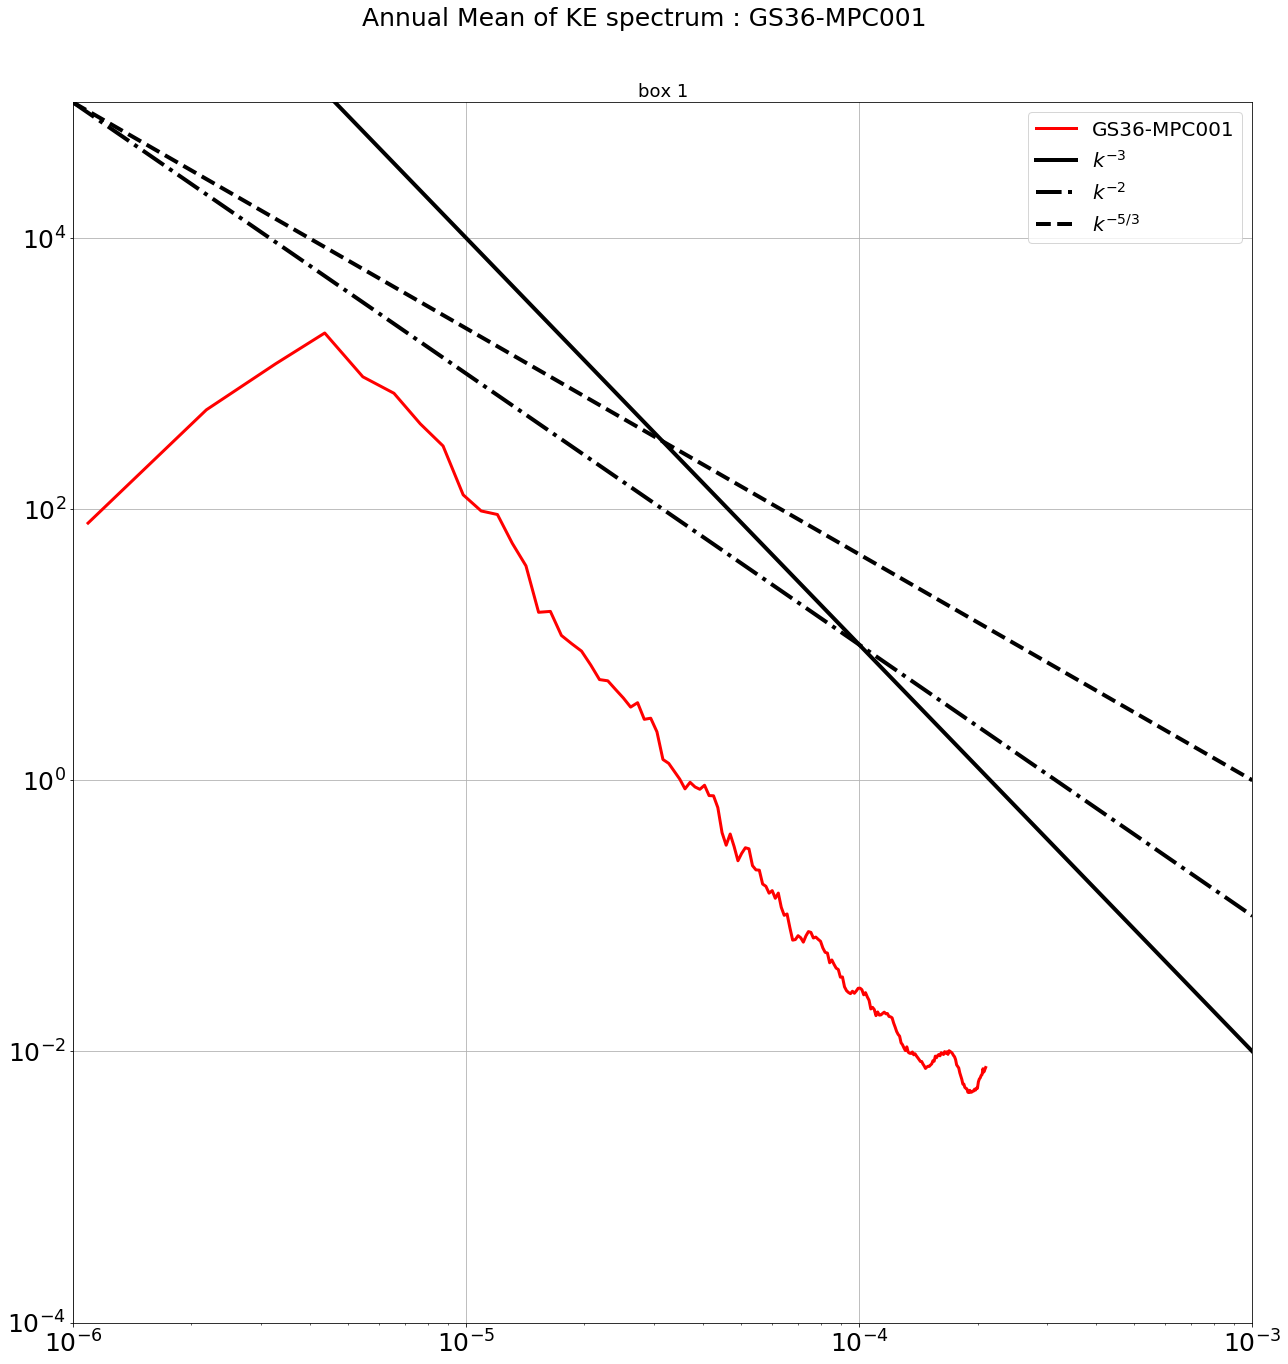

In [22]:
# Final Plots
import pylab as plot
params = {'legend.fontsize': 20,
          'legend.handlelength': 2,
          'axes.titlesize' : 24,
          'axes.labelsize' : 20,
          'lines.linewidth' : 4,
          'lines.markersize' : 10,
          'xtick.labelsize' : 25,
          'ytick.labelsize' : 25}

plot.rcParams.update(params)

fig, axs = plt.subplots(1,1, figsize=(18, 18))
title = 'Annual Mean of KE spectrum : GS36-MPC001'
plt.suptitle(title,size = 25,y=1.05)

# - general slope
k = np.array([1E-6,1E-3])
s3 = k**-3/1.e11
s2 = k**-2/1.e7
s53 = k**(-5./3.)/1.e5

GS36_filenames = sorted(glob.glob('/scratch/cnt0024/hmg2840/albert7a/GS36-spec/GS36-MPC001-KEspec/WaveSpec_box1_KEspec_*.npz'))
GS36_kpsec,GS36_pspec = mean_pspec(GS36_filenames,0,12)
axs.loglog(GS36_pspec,GS36_kpsec,'r',linewidth=3.0,label='GS36-MPC001')
axs.loglog(k,s3,'k-',label=r'$k^{-3}$')
axs.loglog(k,s2,'k-.',label=r'$k^{-2}$')
axs.loglog(k,s53,'k--',label=r'$k^{-5/3}$')
axs.set_xlim(1E-6,1E-3)
axs.set_ylim(1E-4,1E5)
axs.set_title('box 1',size=18)
axs.legend()
axs.grid(True)
fig.tight_layout()